# Exploratory Data Analysis

The term Exploratory Data Analysis (EDA for short) refers to the process of discovering traits about our data that inform future analysis.

Here's the `students` table from the previous page:

In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings
warnings.filterwarnings("ignore") 

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [2]:
students = pd.read_csv('students.csv')
students['Name'] = students['Name'].str.lower()

In [3]:
students

,Name,Role
0,keeley,Student
1,john,Student
2,bryan,Student
...,...,...
276,ernesto,Waitlist Student
277,athan,Waitlist Student
278,michael,Waitlist Student


We are left with a number of questions. How many students are in this class? What does the `Role` column mean? We conduct EDA in order to understand our data more thoroughly.

Oftentimes, we explore the data by repeatedly posing questions as we uncover more information.

**How many students are in our dataset?**

In [4]:
print("There are", len(students), "students on the class.")

There are 279 students on the class.


A natural follow-up question: does this dataset contain the complete list of students? In this case, this table contains all students in one semester's.

**What is the meaning of the `Role` field?**

We often example the field's data in order to understand the field itself.

In [5]:
students['Role'].value_counts().to_frame()

,Role
Student,237
Waitlist Student,42


We can see here that our data contain not only students enrolled in the class at the time but also the students on the waitlist. The `Role` column tells us whether each student is enrolled.

**What about the names?  How can we summarize this field?**

In this textbook we will work with many different kinds of data, including numerical, categorical, and text data. Each type of data has its own set of tools and techniques.

A quick way to start understanding the names is to examine the lengths of the names.

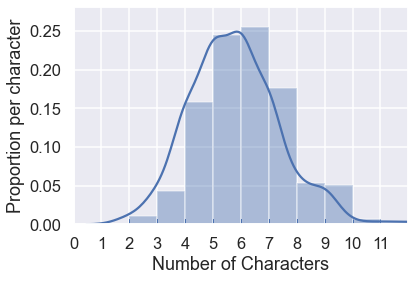

In [6]:
sns.distplot(students['Name'].str.len(),
             rug=True,
             bins=np.arange(12),
             axlabel="Number of Characters")
plt.xlim(0, 12)
plt.xticks(np.arange(12))
plt.ylabel('Proportion per character');

This visualization shows us that most names are between 3 and 9 characters long. This gives us a chance to check whether our data seem reasonable — if there were many names that were 1 character long we'd have good reason to re-examine our data.

## What's in a Name?

Although this dataset is rather simple, we will soon see that first names alone can reveal quite a bit about our group of students.